In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
plt.style.use('bmh')

import plots
plots.plot_width = 10

# plots to draw in do_plots_all()
all_plots = ['select_real', 'store_real',
             'obj_select_real', 'obj_last_insert_real',
             'obj_insert_real', 'obj_store',
             'src_select_real', 'src_insert_real',
             'fsrc_select_real', 'fsrc_insert_real']
whiskers = 4.


# First test with Scylla

- JIRA ticket: https://jira.lsstcorp.org/browse/DM-4692


First run was done with ~150k visits:
- No replication
- All data on a single disk (no RAID)

In [2]:
data_files_scylla1 = [
    "data/DM-24692/apdb-pdac-scylla1-20200430T203116.csv.gz",
    "data/DM-24692/apdb-pdac-scylla1-20200501T010552.csv.gz",
    "data/DM-24692/apdb-pdac-scylla1-20200501T083221.csv.gz",
    "data/DM-24692/apdb-pdac-scylla1-20200501T181829.csv.gz",
    "data/DM-24692/apdb-pdac-scylla1-20200502T063633.csv.gz",
    "data/DM-24692/apdb-pdac-scylla1-20200502T213234.csv.gz",
    "data/DM-24692/apdb-pdac-scylla1-20200503T145856.csv.gz",
    "data/DM-24692/apdb-pdac-scylla1-20200504T104023.csv.gz",
    "data/DM-24692/apdb-pdac-scylla1-20200505T090919.csv.gz",
    "data/DM-24692/apdb-pdac-scylla1-20200506T090737.csv.gz",
    "data/DM-24692/apdb-pdac-scylla1-20200507T090742.csv.gz",
    "data/DM-24692/apdb-pdac-scylla1-20200508T090805.csv.gz",
    "data/DM-24692/apdb-pdac-scylla1-20200509T090813.csv.gz",
    "data/DM-24692/apdb-pdac-scylla1-20200510T090844.csv.gz",
    "data/DM-24692/apdb-pdac-scylla1-20200511T100930.csv.gz",
    "data/DM-24692/apdb-pdac-scylla1-20200512T100950.csv.gz",
    "data/DM-24692/apdb-pdac-scylla1-20200513T101020.csv.gz",
]

In [3]:
frames = [plots._read_csv(file, filter_count=False)[0] for file in data_files_scylla1]

In [4]:
df_scylla1 = pd.concat(frames)
del frames

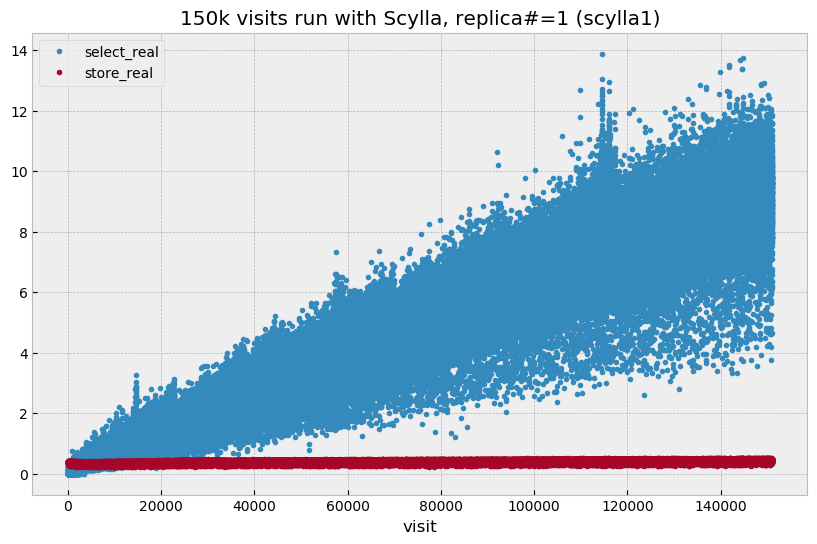

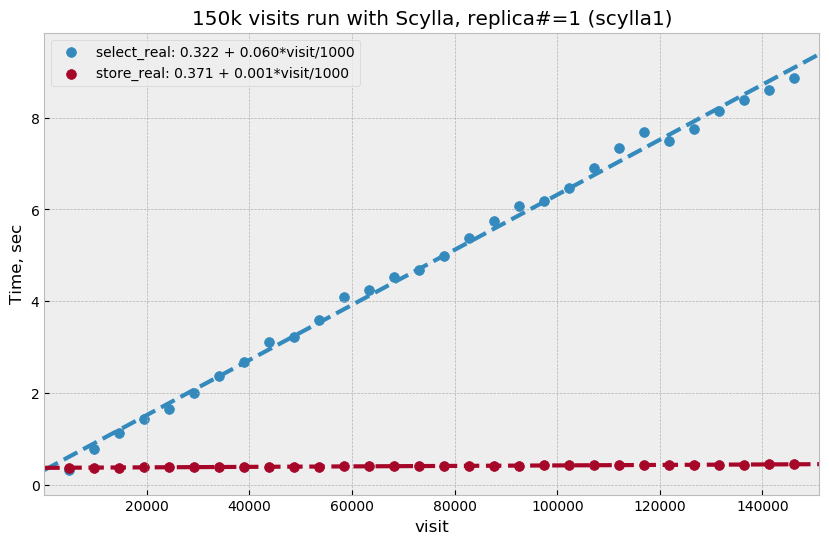

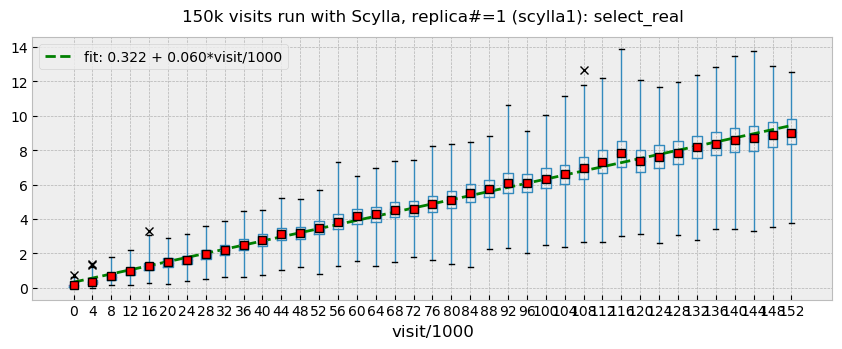

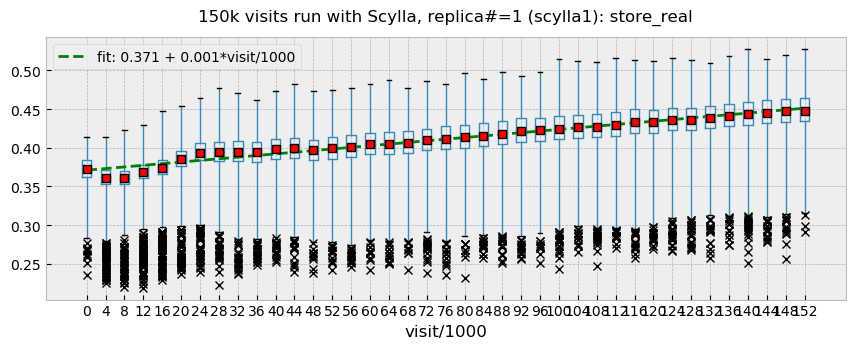

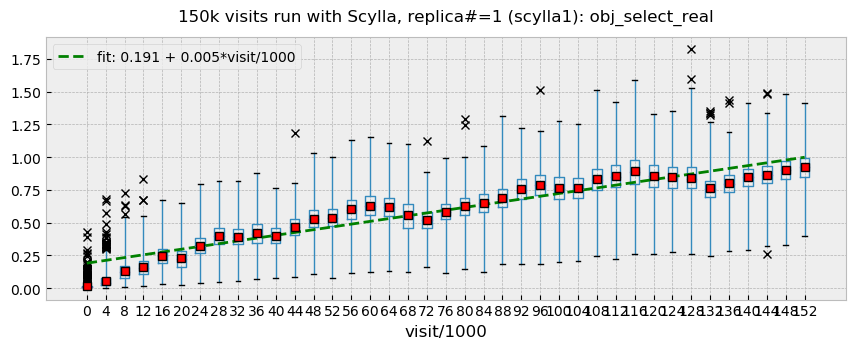

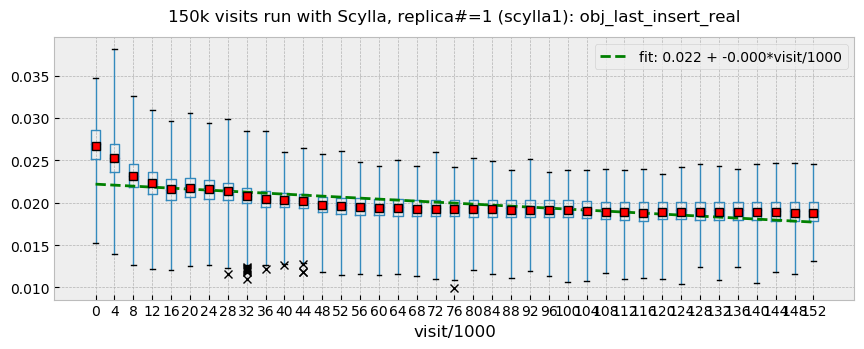

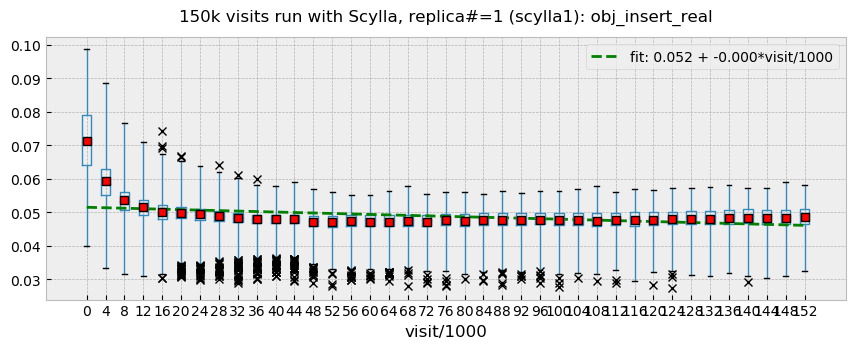

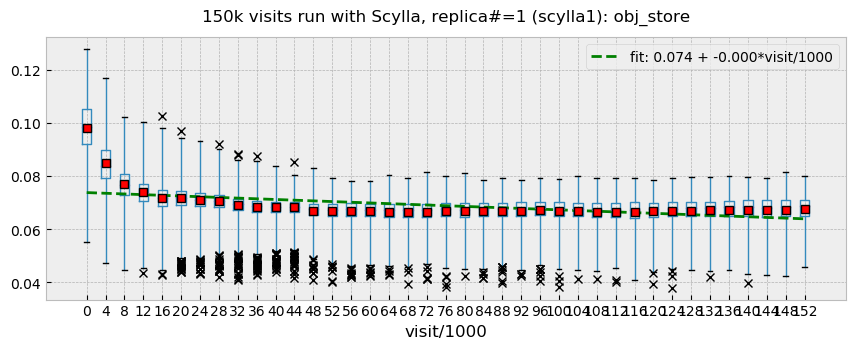

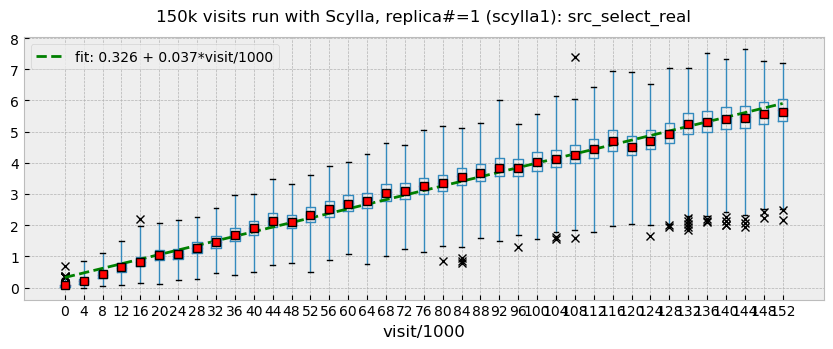

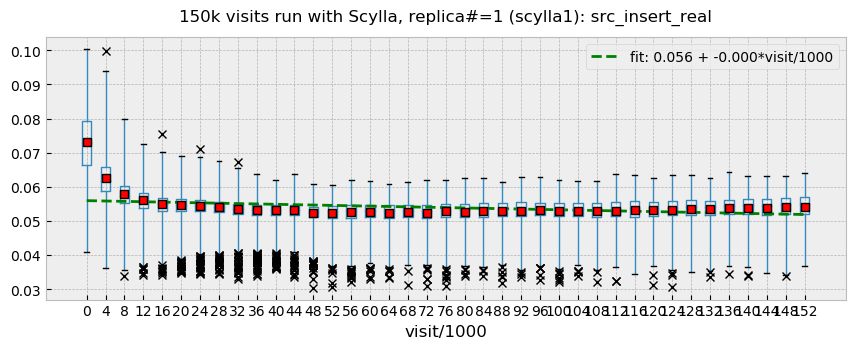

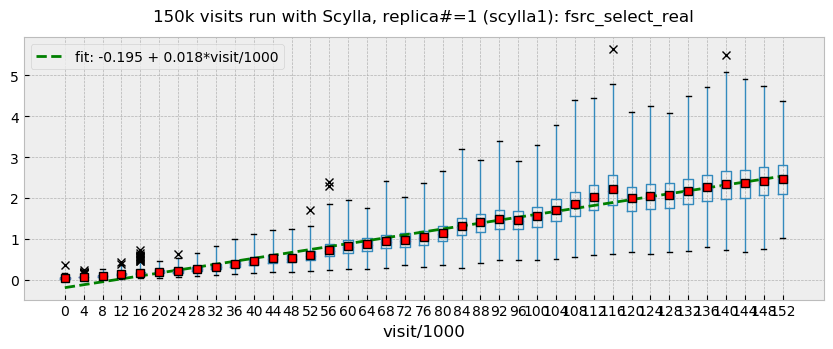

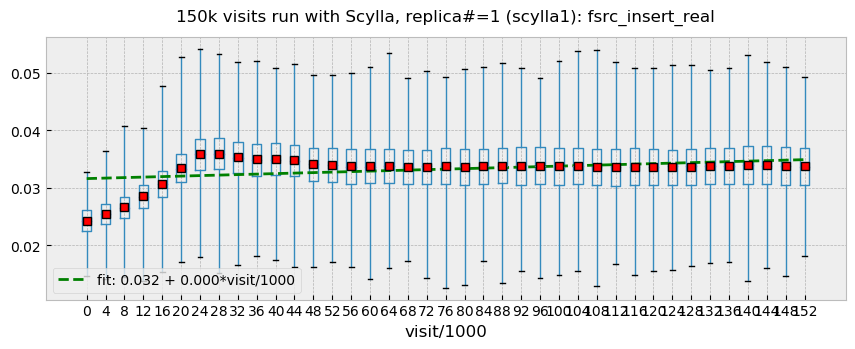

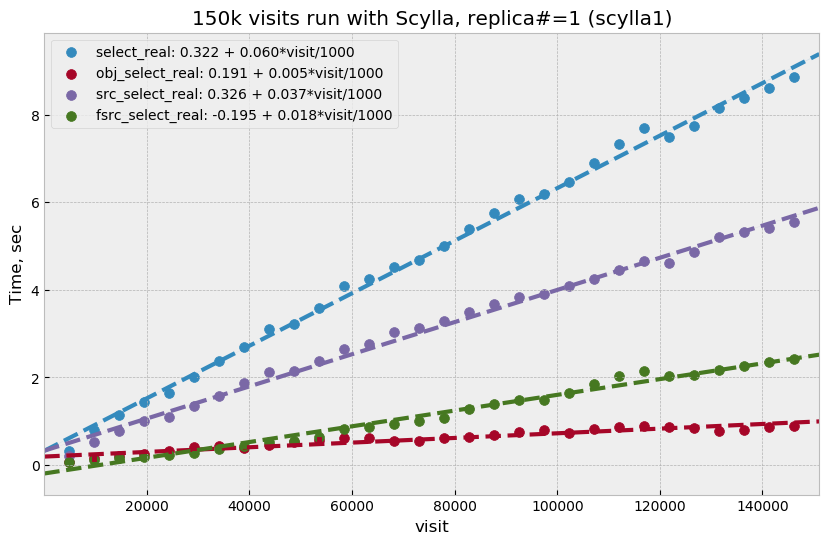

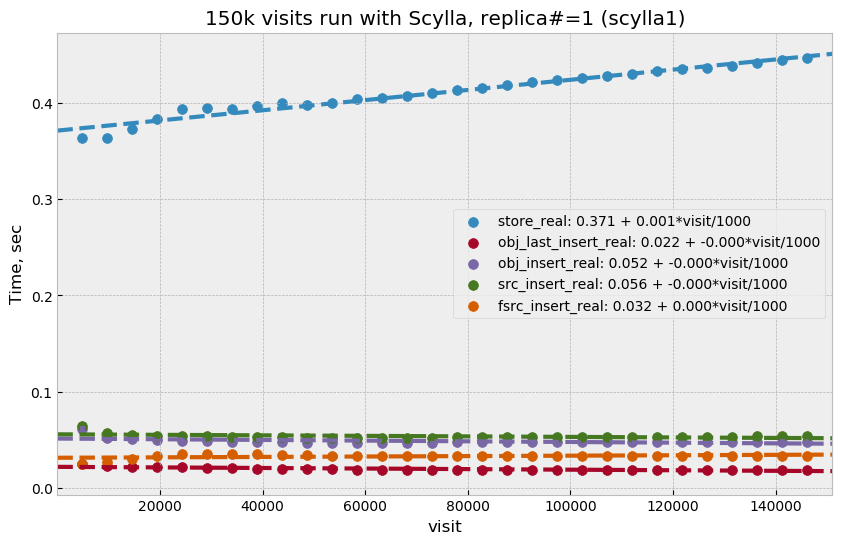

In [5]:
title = "150k visits run with Scylla, replica#=1 (scylla1)"
plots.do_plots_all(df_scylla1, title, bin=4000, plots=all_plots, whis=whiskers);

## Second test with Scylla

- 178k visits
- replication factor 3
- all disks configured in RAID0

In the middle of running I switched to "fractionl" reading of sources to accelerate simulation - sources were only read in the first 100 out 1000 visits.

In [6]:
data_files_scylla2 = [
    "data/DM-24692/apdb-pdac-scylla2-20200514T183602.csv.gz",
    "data/DM-24692/apdb-pdac-scylla2-20200515T015100.csv.gz",
    "data/DM-24692/apdb-pdac-scylla2-20200515T144731.csv.gz",
    "data/DM-24692/apdb-pdac-scylla2-20200516T072240.csv.gz",
    "data/DM-24692/apdb-pdac-scylla2-20200517T032814.csv.gz",
    "data/DM-24692/apdb-pdac-scylla2-20200518T030158.csv.gz",
    "data/DM-24692/apdb-pdac-scylla2-20200519T053521.csv.gz",
    "data/DM-24692/apdb-pdac-scylla2-20200519T172706.csv.gz",
    "data/DM-24692/apdb-pdac-scylla2-20200519T172905.csv.gz",
    "data/DM-24692/apdb-pdac-scylla2-20200519T173102.csv.gz",
    "data/DM-24692/apdb-pdac-scylla2-20200520T040353.csv.gz",
    "data/DM-24692/apdb-pdac-scylla2-20200520T171833.csv.gz",
    "data/DM-24692/apdb-pdac-scylla2-20200520T231020.csv.gz",
    "data/DM-24692/apdb-pdac-scylla2-20200521T081219.csv.gz",
    "data/DM-24692/apdb-pdac-scylla2-20200521T174759.csv.gz",
    "data/DM-24692/apdb-pdac-scylla2-20200522T040423.csv.gz",
    "data/DM-24692/apdb-pdac-scylla2-20200522T140507.csv.gz",
    "data/DM-24692/apdb-pdac-scylla2-20200523T005046.csv.gz",
    "data/DM-24692/apdb-pdac-scylla2-20200523T122235.csv.gz",
    "data/DM-24692/apdb-pdac-scylla2-20200524T014135.csv.gz",
    "data/DM-24692/apdb-pdac-scylla2-20200524T133011.csv.gz",
]

In [7]:
frames = [plots._read_csv(file, filter_count=False)[0] for file in data_files_scylla2]
df_scylla2 = pd.concat(frames)
del frames
# strip visits that did not measure read time
df_scylla2 = df_scylla2[(df_scylla2.index % 1000) < 100]


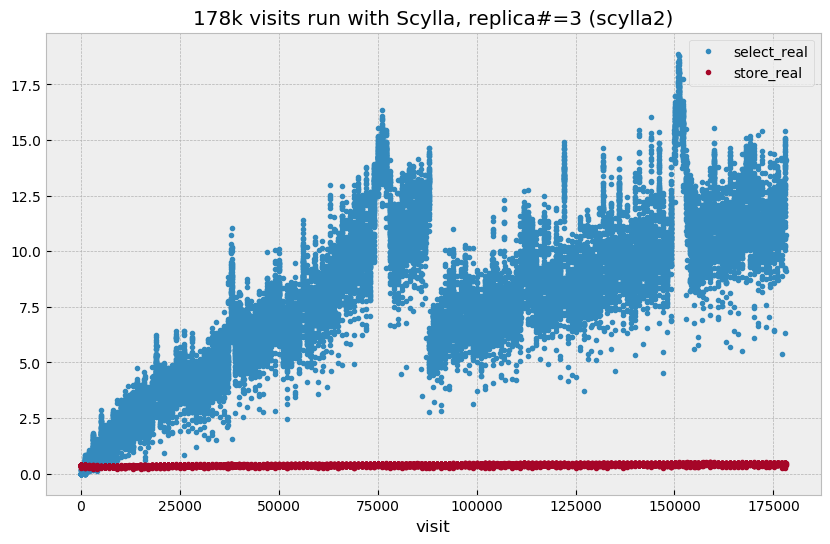

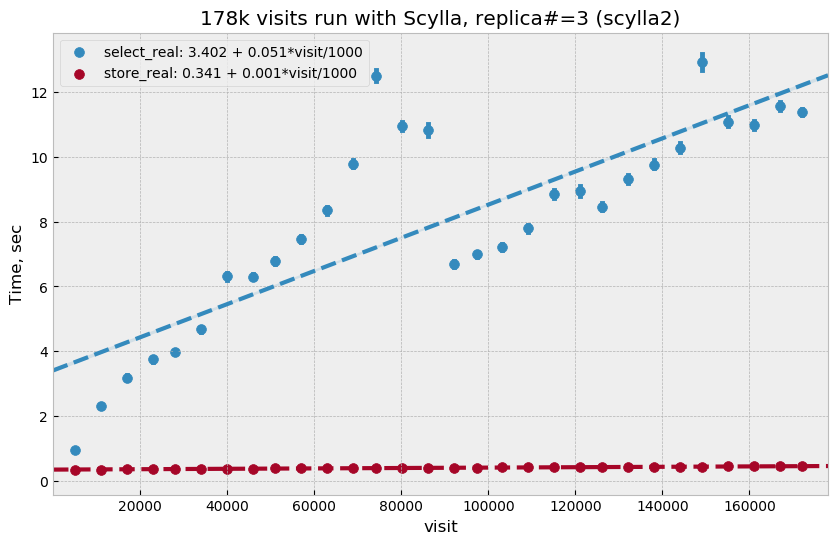

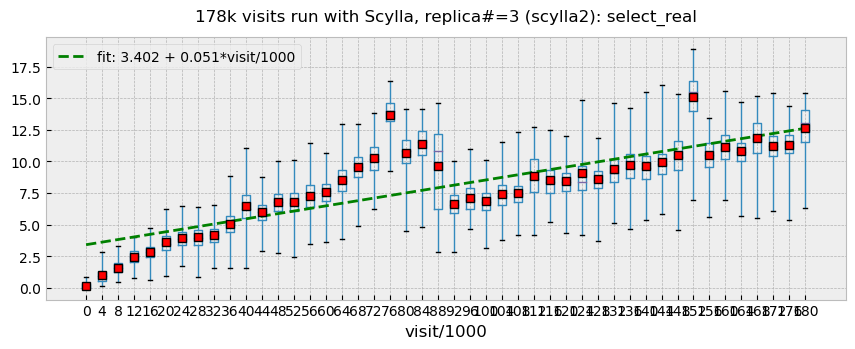

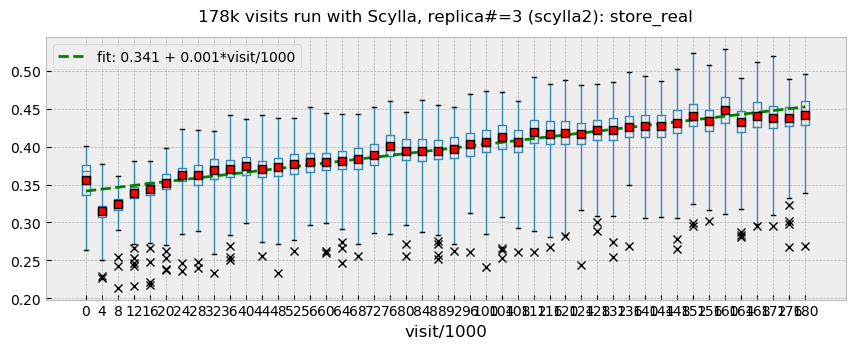

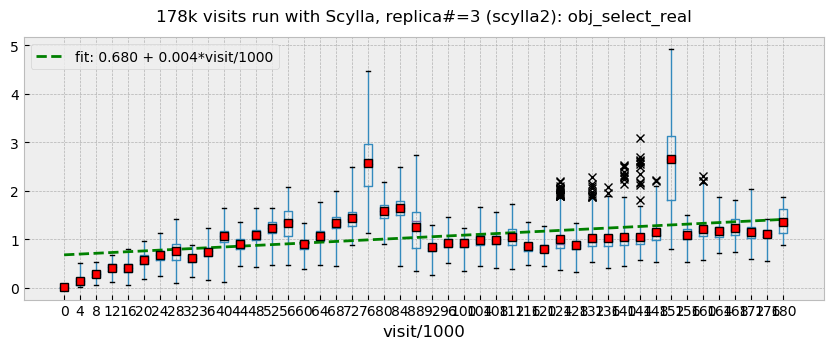

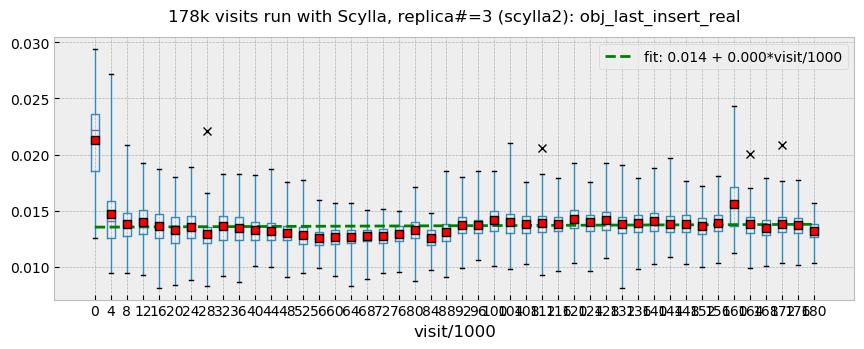

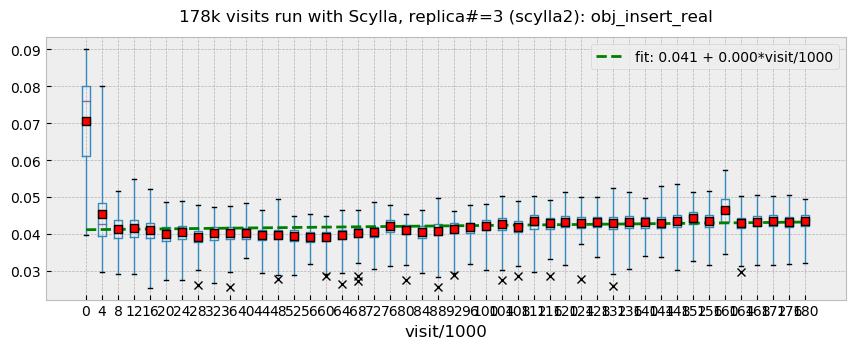

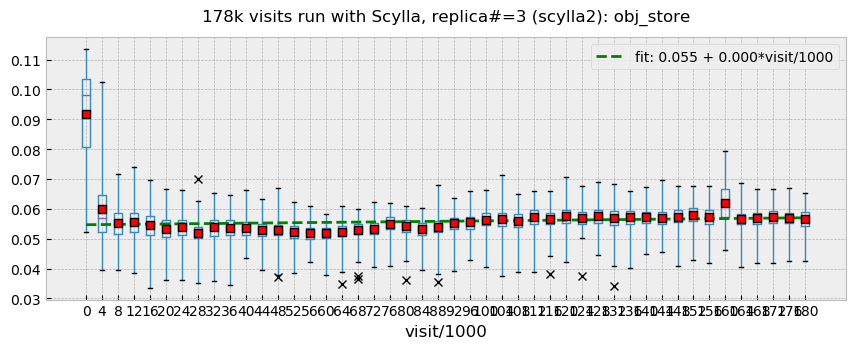

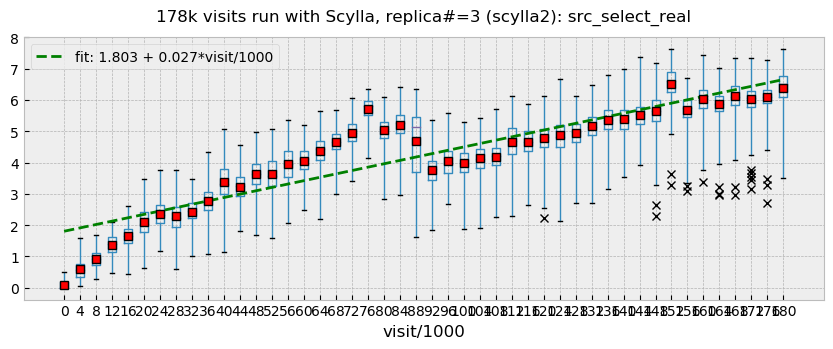

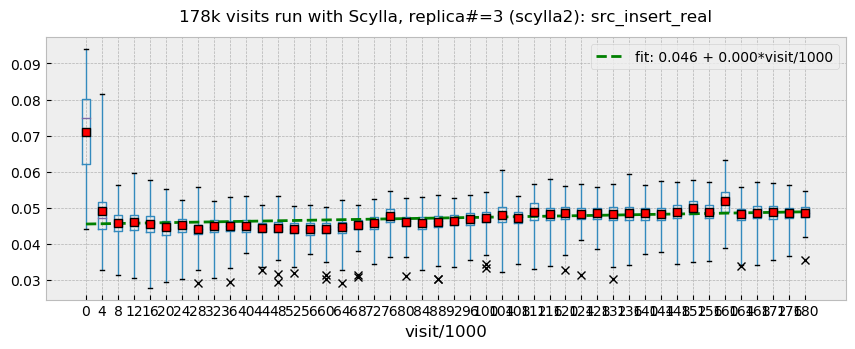

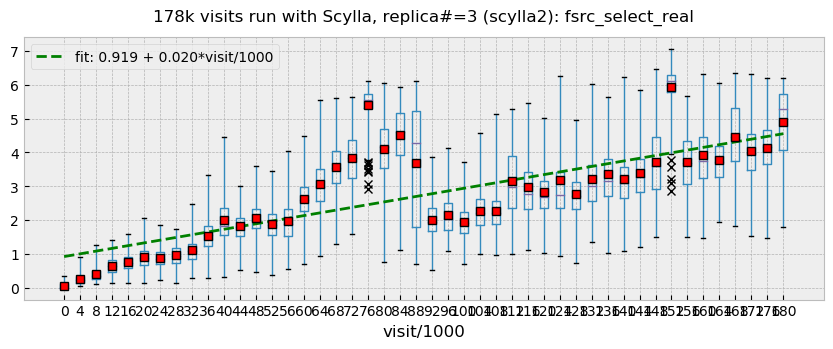

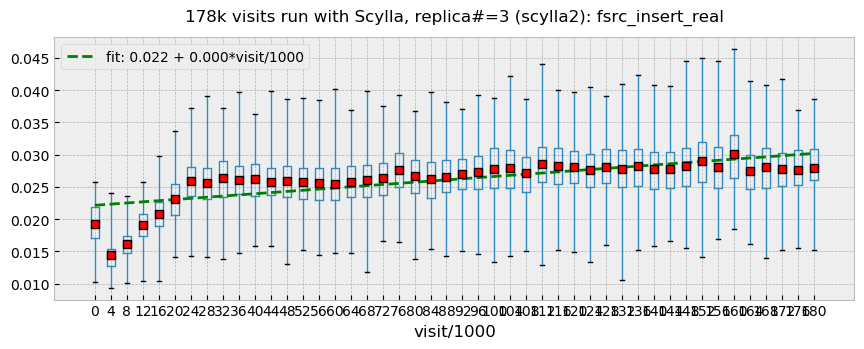

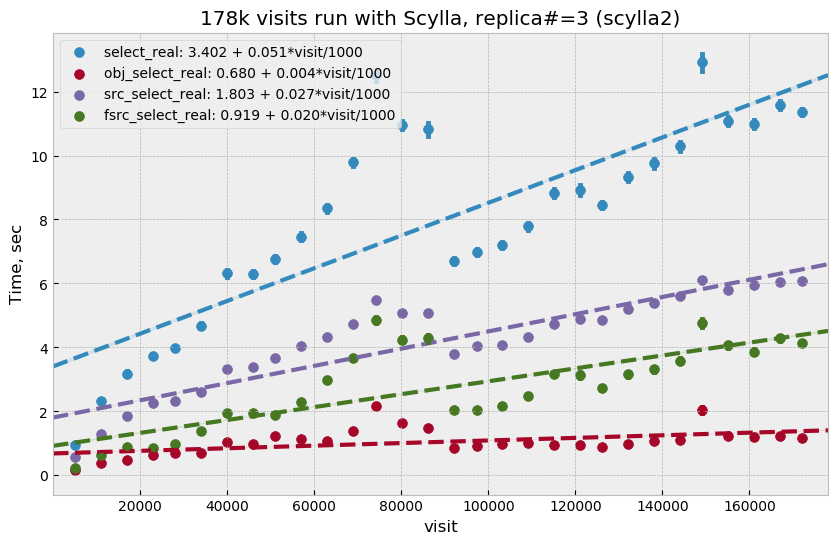

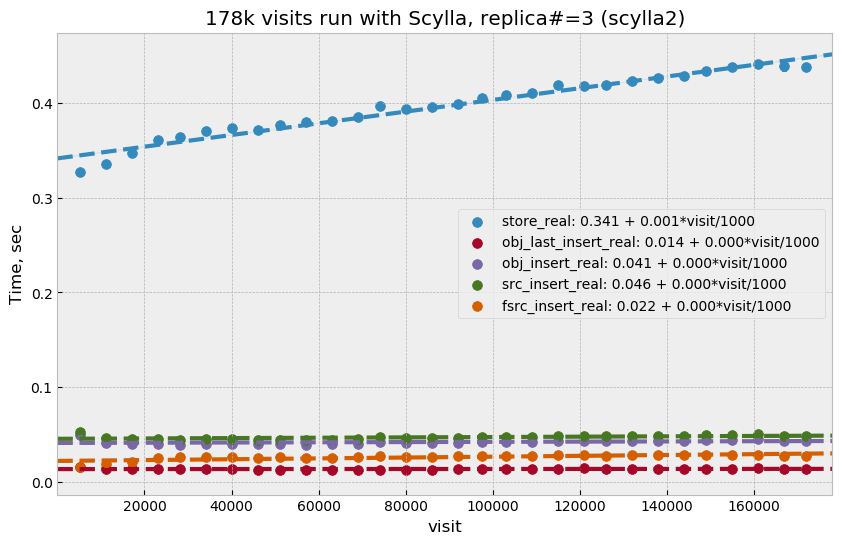

In [8]:
title = "178k visits run with Scylla, replica#=3 (scylla2)"
plots.do_plots_all(df_scylla2, title, bin=4000, plots=all_plots, whis=whiskers);